# faire exemple avec visualiser le image de test mnist fashion

2023-02-24 11:10:46.464655: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


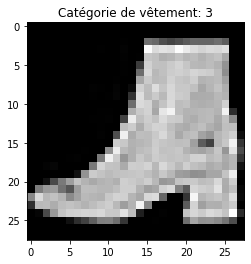

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import keras as keras
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Choisir une image aléatoire dans le jeu de données de test
random_index = np.random.randint(0, len(x_test))
image = x_train[589]

# Visualiser l'image
plt.imshow(image, cmap='gray')
plt.title("Catégorie de vêtement: {}".format(y_test[random_index]))
plt.show()

In [2]:
#!pip install tensorflow

# faire exemple avec visualiser le image de test mnist fashion en utilisant réseaux neurones 


Epoch 1/10
469/469 [==============================] - 24s 48ms/step - loss: 0.4732 - accuracy: 0.8366
Epoch 2/10
469/469 [==============================] - 21s 46ms/step - loss: 0.3094 - accuracy: 0.8913
Epoch 3/10
469/469 [==============================] - 20s 43ms/step - loss: 0.2687 - accuracy: 0.9052
Epoch 4/10
469/469 [==============================] - 20s 43ms/step - loss: 0.2417 - accuracy: 0.9141
Epoch 5/10
469/469 [==============================] - 23s 48ms/step - loss: 0.2230 - accuracy: 0.9196
Epoch 6/10
469/469 [==============================] - 22s 46ms/step - loss: 0.2076 - accuracy: 0.9260
Epoch 7/10
469/469 [==============================] - 21s 45ms/step - loss: 0.1916 - accuracy: 0.9308
Epoch 8/10
469/469 [==============================] - 20s 43ms/step - loss: 0.1801 - accuracy: 0.9343
Epoch 9/10
469/469 [==============================] - 19s 41ms/step - loss: 0.1660 - accuracy: 0.9395
Epoch 10/10
313/313 [==============================] - 3s 8ms/step - loss: 0.2574 

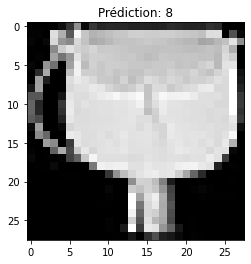

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

yy_test=y_test

# Prétraiter les données pour la classification
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convertir les étiquettes en vecteurs de catégories one-hot
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Définir le modèle
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# Compiler le modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraîner le modèle
model.fit(x_train, y_train, epochs=10 , batch_size=128)

# Évaluer le modèle
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Choisir une image aléatoire dans le jeu de données de test
random_index = np.random.randint(0, len(x_test))
image = x_test[random_index].reshape(1, 28, 28, 1)

# Utiliser le modèle pour prédire la catégorie de l'image
prediction = model.predict(image).argmax()

# Visualiser l'image
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title("Prédiction: {}".format(prediction))
plt.show()

model.save('fashionmodel.h5')



1/1 [==============================] - 0s 47ms/step


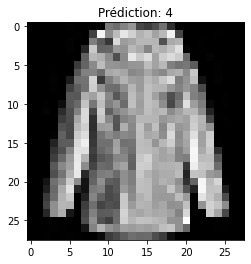

'Coat'

In [6]:
# Choisir une image aléatoire dans le jeu de données de test
random_index = np.random.randint(0, len(x_test))
image = x_test[random_index].reshape(1, 28, 28, 1)

# Utiliser le modèle pour prédire la catégorie de l'image
prediction = model.predict(image).argmax()

# Visualiser l'image
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title("Prédiction: {}".format(prediction))
plt.show()
classes[prediction]


1/1 [==============================] - 0s 91ms/step


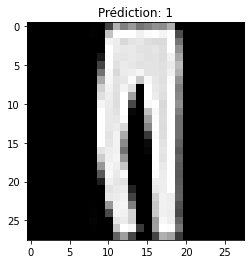

'Trouser'

In [7]:

model = keras.models.load_model('fashionmodel.h5')
# Visualiser l'image
classes = ["T-shirt/top" , "Trouser" , "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" ,"Sneaker" , "Bag" ,"Ankel boot"]
# Choisir une image aléatoire dans le jeu de données de test
random_index = np.random.randint(0, len(x_test))
image = x_test[2].reshape( 1 ,28, 28, 1)

# Utiliser le modèle pour prédire la catégorie de l'image
prediction = model.predict(image).argmax()

# Visualiser l'image
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title("Prédiction: {}".format(prediction))
plt.show()

classes[prediction]

In [269]:
y_pred = model.predict(x_test)
y_pred 

y_classes =np.array([np.argmax(el) for el in y_pred]) 
print(y_classes.shape)
print(yy_test.shape)

313/313 [==============================] - 1s 4ms/step
(10000,)
(10000,)


In [270]:


from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(yy_test, y_classes)
print(confusion)
classes = ["T-shirt/top" , "Trouser" , "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" ,"Sneaker" , "Bag" ,"Ankel boot"]
np.trace(confusion)/(np.sum(confusion))

[[881   0  17  12   2   2  79   0   7   0]
 [  2 988   2   5   1   0   2   0   0   0]
 [ 14   2 887   5  37   0  55   0   0   0]
 [ 26  10  16 892  23   0  30   0   3   0]
 [  1   1  93  25 819   0  60   0   1   0]
 [  0   0   0   0   0 989   0   6   0   5]
 [122   2  67  22  51   0 727   0   9   0]
 [  0   0   0   0   0  21   0 955   0  24]
 [  3   1   4   2   4   2   4   2 978   0]
 [  0   0   0   0   0   9   1  31   0 959]]


0.9075

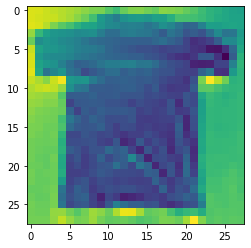

In [21]:





loaded_model = keras.models.load_model('fashionmodel.h5')
from PIL import Image
import numpy as np
from PIL import ImageOps


# Load the image
image2 = Image.open('ts2.jpg')
image2 = image2.convert('L')
image2 = image2.resize((28, 28))
image2 = ImageOps.invert(image2)
image_array =  np.array(image2 , dtype = 'float32')
image_array = image_array.flatten()
image_array = image_array.reshape((28, 28))
image_array/=255
plt.imshow(image_array )


1/1 [==============================] - 0s 33ms/step


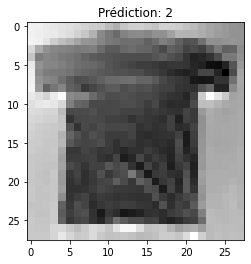

'Pullover'

In [22]:

image = image_array .reshape( 1 ,28, 28, 1)

# Utiliser le modèle pour prédire la catégorie de l'image
prediction = model.predict(image).argmax()

# Visualiser l'image
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title("Prédiction: {}".format(prediction))
plt.show()
classes[prediction]


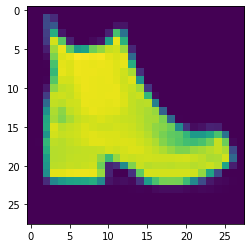

NameError: name 'x_text' is not defined

In [195]:
loaded_model = keras.models.load_model('fashionmodel.h5')
from PIL import Image
import numpy as np
from PIL import ImageOps

# Load the image
image = Image.open('imm3.jpg')

# Convert the image to grayscale
image = image.convert('L')

# Resize the image to 28x28 pixels
image = image.resize((28, 28))

# Invert the colors (if necessary)
image = ImageOps.invert(image)

# Convert the image to a numpy array
image_array = np.array(image)

# Flatten the image array
image_array = image_array.flatten()

# Reshape the image array to be 28x28 pixels
image_array = image_array.reshape((28, 28))

# Normalize the pixel values to be between 0 and 1
image_array = image_array / 255.0

# Convert the pixel values to integers between 0 and 255
image_array = (image_array * 255).astype(np.uint8)

# Display the image
plt.imshow(image_array, cmap='gray')
plt.show()

y_pred = loaded_model.predict(np.expand_dims(x_text[0]))


y_classes = [np.argmax(el) for el in y_pred]

print(classes[y_classes[0]])

# Désolé si le code précédent était un peu complexe. Je vais essayer de vous expliquer ce qui se passe étape par étape.

    Importation des bibliothèques: Nous importons les bibliothèques nécessaires pour le traitement et la visualisation de données, ainsi que la bibliothèque TensorFlow pour construire et entraîner un réseau neuronal.

    Chargement des données: Nous utilisons la fonction load_data pour charger les données d'entraînement et de test MNIST Fashion. Les données sont divisées en deux parties: x_train et y_train sont les données d'entraînement et les étiquettes associées, tandis que x_test et y_test sont les données de test et les étiquettes associées.

    Prétraitement des données: Nous réformons les données x_train et x_test pour les adapter à la forme d'entrée attendue par le réseau neuronal. Nous normalisons également les données pour les mettre dans l'intervalle [0, 1].

    Conversion des étiquettes: Nous convertissons les étiquettes y_train et y_test en vecteurs de catégories one-hot pour les utiliser dans la classification.

    Définition du modèle: Nous définissons un modèle de réseau neuronal simple à l'aide de la bibliothèque Keras. Le modèle comporte plusieurs couches de neurones: une couche de convolution pour extraire les caractéristiques des données d'entrée, une couche de pooling pour réduire la dimension de ces caractéristiques, une couche de densité pour les utiliser dans la classification, et une couche de sortie pour fournir les prédictions.

    Compilation du modèle: Nous compilons le modèle en définissant la fonction de coût (entropie croisée), l'optimiseur (Adam) et les métriques (exactitude) à utiliser lors de l'entraînement.

    Entraînement du modèle: Nous entraînons le modèle en utilisant les données d'entraînement x_train et y_train pendant 10 époques, avec un lot de 128 images à chaque fois.

    Évaluation du modèle: Nous évaluons le modèle en utilisant les données de test x_test et y_test. Nous affichons l'exactitude de test obtenue.

    Prédiction d'une image aléatoire: Nous choisissons une image aléatoire dans le jeu de données de



# Cahierde charge EST


    Objectifs:
        Mettre en œuvre un réseau de neurones convolutif pour classer les images de vêtements dans le jeu de données MNIST Fashion.
        Évaluer la performance du modèle en utilisant l'exactitude de test.

    Données d'entrée:
        Jeu de données MNIST Fashion comprenant 70 000 images de vêtements étiquetées dans 10 classes différentes.

    Plateforme de développement:
        Python avec les bibliothèques TensorFlow et Keras.

    Modèle:
        Réseau de neurones convolutif à plusieurs couches avec des couches de convolution, de pooling et de normalisation.
        Le modèle sera entraîné sur 60 000 images du jeu de données MNIST Fashion et évalué sur 10 000 images restantes.

    Performance:
        La performance du modèle sera mesurée en utilisant l'exactitude de test. Une exactitude de test supérieure à 90% sera considérée comme un bon résultat.

    Livrables:
        Code source complet pour l'application.
        Un rapport détaillant les étapes de développement et les résultats obtenus.
        Visualisation des résultats de performance sous forme de graphiques et de tableaux.

    Délai:
        Le projet sera livré dans un délai de 4 semaines à compter de la date de démarrage.

313/313 [==============================] - 1s 2ms/step


array([[1.3010341e-26, 2.8321282e-13, 0.0000000e+00, ..., 5.7296723e-02,
        1.2462572e-11, 9.3160880e-01],
       [3.8591444e-03, 2.1129877e-03, 7.2275305e-01, ..., 6.6453125e-26,
        2.6260730e-04, 4.5493085e-18],
       [9.2157488e-13, 1.0000000e+00, 3.8010863e-34, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [9.5991592e-10, 0.0000000e+00, 1.2823623e-13, ..., 4.3593449e-35,
        1.0000000e+00, 3.2397393e-27],
       [3.8351693e-11, 9.9999988e-01, 1.5354677e-26, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.7380071e-07, 4.8180167e-09, 1.7763508e-06, ..., 1.7746350e-01,
        2.1878110e-01, 4.0528059e-04]], dtype=float32)

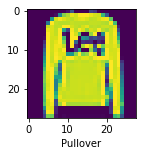

In [56]:
# build the model

import tensorflow as tf
from tensorflow.keras import datasets , layers , models
import matplotlib.pyplot as plt
import numpy as np 
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
classes = ["T-shirt/top" , "Trouser" , "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" ,"Sneaker" , "Bag" ,"Ankel boot"]
y_train = y_train.reshape(-1)
def plot_sample(x , y , index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])
plot_sample(x_train , y_train , 1)

cnn =  models.Sequential([
    
   
    layers.Flatten(),
    layers.Dense(64 , activation = 'relu'),
    layers.Dense(10 , activation = 'softmax')
    
 ])

cnn.compile(optimizer = 'adam' ,
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

cnn.fit(x_train , y_train , epochs = 10)
cnn.evaluate(x_test , y_test)

cnn.save('fashionmodel.h5')

y_test = y_test.reshape(-1)
plot_sample(x_test , y_test , 1)
y_pred = cnn.predict(x_test)
y_pred[10:]
y_classes = [np.argmax(el) for el in y_pred]
y_classes[:5]
plot_sample(x_test , y_test , 2)
classes[np.argmax(y_pred[2])]

    

In [ ]:

cnn= keras.models.load_model('fashionmodel.h5')



y_test = y_test.reshape(-1)
plot_sample(x_test , y_test , 1)
y_pred = cnn.predict(x_test)

plt.imshow(y_pred)


In [62]:
y_test.shape
y_classes = [np.argmax(el) for el in y_pred]

In [69]:
y_classes = np.array(y_classes)

from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_classes)
print(confusion)
classes = ["T-shirt/top" , "Trouser" , "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" ,"Sneaker" , "Bag" ,"Ankel boot"]
np.trace(confusion)/(np.sum(confusion))

[[800   2 101  44   1   0  43   0   9   0]
 [  8 940   9  39   3   0   1   0   0   0]
 [ 10   0 933   9  39   0   9   0   0   0]
 [ 13   9  81 872   4   0  19   0   2   0]
 [  0   0 438  63 451   0  47   0   1   0]
 [  0   1   5   0   0 876   0  51  17  50]
 [149   0 417  30  43   0 343   0  18   0]
 [  0   0   0   0   0  12   0 946   4  38]
 [  0   0  57   6   1   1  21   2 912   0]
 [  0   0   1   1   0   3   0  47   1 947]]


0.802

1/1 [==============================] - 0s 85ms/step


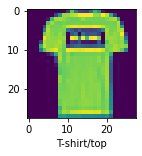

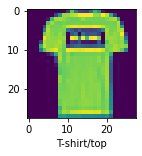

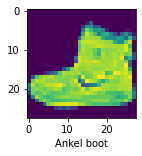

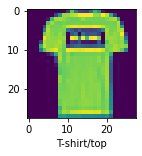

In [108]:
loaded_model = keras.models.load_model('fashionmodel.h5')



# Make predictions on the new data using the loaded model


def plot_sample(x , y , index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

y_test = y_test.reshape(-1)
plot_sample(x_train , y_train , 1)



# Select a single sample from the x_train dataset

sample = x_train[1]

# Add an extra dimension to the sample
sample = np.expand_dims(sample, axis=0)

# Make predictions on the sample using the loaded model
y_pred= loaded_model.predict(sample)

# Print the predictions


y_classes = [np.argmax(el) for el in y_pred]
plot_sample(sample , y_classes , 0)


for i in range(2):
    plot_sample(x_train , y_train , i)
    




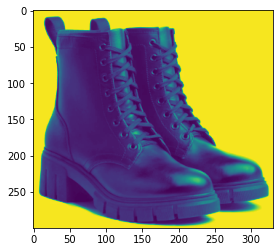

In [22]:


import numpy as np
from PIL import Image

# Open the image in RGB mode and convert it to a NumPy array
rgb_image = np.array(Image.open('imm.png').convert('RGB'))

# Convert the image to grayscale using the average method
grayscale_image = np.mean(rgb_image, axis=2).astype(np.uint8)

# Convert the NumPy array back to an image and save it
grayscale_image = Image.fromarray(grayscale_image)


plt.imshow(grayscale_image)

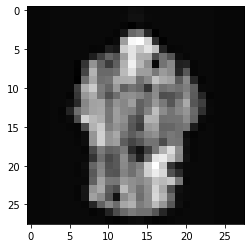

NameError: name 'x_text' is not defined

In [43]:
loaded_model = keras.models.load_model('fashionmodel.h5')
from PIL import Image
import numpy as np
from PIL import ImageOps

# Load the image
image = Image.open('f1.jpg')

# Convert the image to grayscale
image = image.convert('L')

# Resize the image to 28x28 pixels
image = image.resize((28, 28))

# Invert the colors (if necessary)
image = ImageOps.invert(image)

# Convert the image to a numpy array
image_array = np.array(image)

# Flatten the image array
image_array = image_array.flatten()

# Reshape the image array to be 28x28 pixels
image_array = image_array.reshape((28, 28))

# Normalize the pixel values to be between 0 and 1
image_array = image_array / 255.0

# Convert the pixel values to integers between 0 and 255
image_array = (image_array * 255).astype(np.uint8)

# Display the image
plt.imshow(image_array, cmap='gray')
plt.show()

y_pred = loaded_model.predict(np.expand_dims(x_text[0]))


y_classes = [np.argmax(el) for el in y_pred]

print(classes[y_classes[0]])

In [42]:
image_2d[:,:,1] = image_2d[:,:,1]*255

image_2d[:,:,1][ 253 < image_2d[:,:,1] ]=0


y_pred = loaded_model.predict( image_2d[:,:,1])


y_classes = [np.argmax(el) for el in y_pred]






plt.imshow( image_2d[:,:,1])
print(classes[y_classes[0]])


NameError: name 'image_2d' is not defined

1/1 [==============================] - 0s 28ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


T-shirt/top


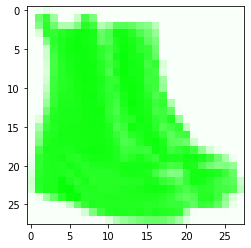

In [34]:
y_pred = loaded_model.predict(image_2d)


y_classes = [np.argmax(el) for el in y_pred]

plt.imshow(image_2d)

print(classes[y_classes[0]])

TypeError: Invalid shape (1, 300, 330, 4) for image data

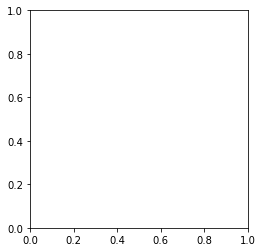

In [35]:

single_image=plt.imread("imm.png")

# Reshape the image data so that it's suitable for the model
single_image = single_image.reshape(1, *single_image.shape)



plt.imshow(single_image)


In [36]:
import cv2
single_image=plt.imread("imm.png")
single_image=single_image
print(single_image.shape)


image_2d = cv2.resize(single_image, (28, 28), interpolation=cv2.INTER_AREA)

print(image_2d[ : , : ,1].shape)




y_pred= loaded_model.predict(image_2d)

# Print the predictions


y_classes = [np.argmax(el) for el in y_pred]
plot_sample(image_2d , y_classes , 0)


plt.imshow(single_image)

(300, 330, 4)
(28, 28)
1/1 [==============================] - 0s 25ms/step


NameError: name 'plot_sample' is not defined

In [37]:
import cv2
import numpy as np


image_3d = single_image.reshape(300, 330, 4)

# Resize the image tensor to shape (28, 28)
image_2d = cv2.resize(image_3d, (28, 28), interpolation=cv2.INTER_AREA)
print(image_2d[ : , : ,1].shape)



(28, 28)


(28, 28, 1)

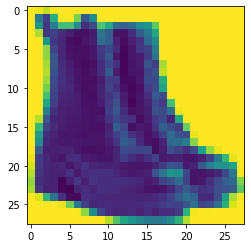

In [38]:
plt.imshow(image_2d[ : , : ,1])
x_test[0].shape

1/1 [==============================] - 0s 59ms/step
4
Coat
[4]


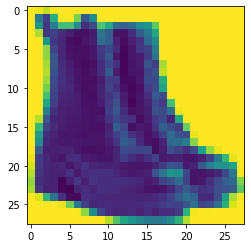

In [39]:
loaded_model = keras.models.load_model('fashionmodel.h5')
classes = ["T-shirt/top" , "Trouser" , "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" ,"Sneaker" , "Bag" ,"Ankel boot"]

y_pred = loaded_model.predict( image_2d[ : , : ,1].reshape(1, *image_2d[ : , : ,1].shape))

print(np.argmax(y_pred))
print(classes[np.argmax(y_pred[0])])
y_classes = [np.argmax(el) for el in y_pred]
print(y_classes)

plt.imshow(image_2d[ : , : ,1])





In [9]:
# load and prepare the image
def load_image(filename):
 # load the image
 img = load_img(filename, grayscale=True, target_size=(28, 28))
 # convert to array
 img = img_to_array(img)
 # reshape into a single sample with 1 channel
 img = img.reshape(1, 28, 28, 1)
 # prepare pixel data
 img = img.astype('float32')
 img = img / 255.0
 return img

In [10]:

# predict the class
result = model.predict_classes(img)

NameError: name 'model' is not defined

In [15]:

from keras.preprocessing.image import img_to_array
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
model = load_model('fashionmodel.h5')
# Load the image

img = load_img('imm.png')

result = model.predict_classes(img)
# load and prepare the image
def load_image(filename):
 # load the image
 img = load_img(filename, grayscale=True, target_size=(28, 28))
 # convert to array
 img = img_to_array(img)
 # reshape into a single sample with 1 channel
 img = img.reshape(1, 28, 28, 1)
 # prepare pixel data
 img = img.astype('float32')
 
 return img
 
# load an image and predict the class
def run_example():
 # load the image
 img = load_image('imm.png')
 # load model

 # predict the class
 result = model.predict_classes(img)
 print(result[0])
 
# entry point, run the example
run_example()

ImportError: cannot import name 'img_to_array' from 'keras.preprocessing.image' (/opt/anaconda3/lib/python3.9/site-packages/keras/preprocessing/image.py)

In [16]:
pip install --upgrade tensorflow
pip install --upgrade keras

SyntaxError: invalid syntax (1566520633.py, line 1)